In [15]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
  "company": ["A", "B", "C", "A", "B", "C", "A", "B", "A", "A"],
  "salary": [10000, 10000, 50000, 50000, 40000, 50000, 30000, 10000, 20000, 40000],
  "age": [25, 30, 35, 40, 45, 20, 25, 30, 30, 35]
}
)
print('data = \n', data)


data = 
   company  salary  age
0       A   10000   25
1       B   10000   30
2       C   50000   35
3       A   50000   40
4       B   40000   45
5       C   50000   20
6       A   30000   25
7       B   10000   30
8       A   20000   30
9       A   40000   35


1.1单列分组 https://blog.csdn.net/craftsman2020/article/details/116300400
##### 总结来说，groupby的过程就是将原有的DataFrame按照groupby的字段（这里是company），划分为若干个分组DataFrame，被分为多少个组就有多少个分组DataFrame。所以说，在groupby之后的一系列操作（如agg、apply等），均是基于子DataFrame的操作。理解了这点，也就基本摸清了Pandas中groupby操作的主要原理。下面来讲讲groupby之后的常见操作。
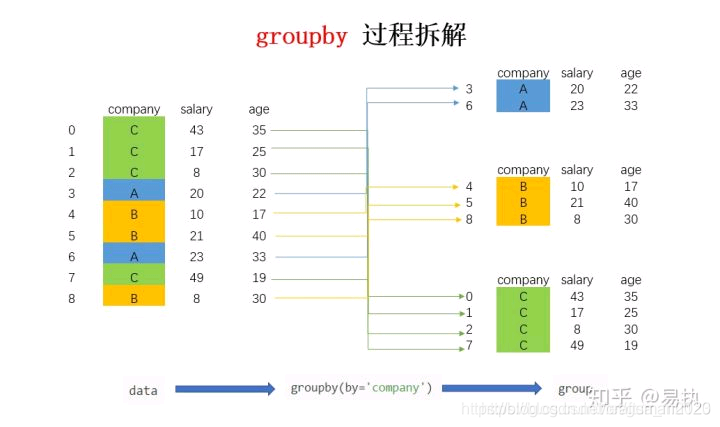

In [16]:
group = data.groupby("company") # 会返回一个groupby对象，组别默认是排序的
print('group = ', group)  
print('list(group) = \n', list(group))

for index, data1 in group:
    print('index = ', index)
    print('data = \n', data1)


group =  <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001695F58AAB0>
list(group) = 
 [('A',   company  salary  age
0       A   10000   25
3       A   50000   40
6       A   30000   25
8       A   20000   30
9       A   40000   35), ('B',   company  salary  age
1       B   10000   30
4       B   40000   45
7       B   10000   30), ('C',   company  salary  age
2       C   50000   35
5       C   50000   20)]
index =  A
data = 
   company  salary  age
0       A   10000   25
3       A   50000   40
6       A   30000   25
8       A   20000   30
9       A   40000   35
index =  B
data = 
   company  salary  age
1       B   10000   30
4       B   40000   45
7       B   10000   30
index =  C
data = 
   company  salary  age
2       C   50000   35
5       C   50000   20


1.2多列分组

In [17]:
df_gb = data.groupby(['company', 'salary'])
for (index1, index2), data1 in df_gb:
    print((index1, index2))
    print('data = \n', data1)


('A', 10000)
data = 
   company  salary  age
0       A   10000   25
('A', 20000)
data = 
   company  salary  age
8       A   20000   30
('A', 30000)
data = 
   company  salary  age
6       A   30000   25
('A', 40000)
data = 
   company  salary  age
9       A   40000   35
('A', 50000)
data = 
   company  salary  age
3       A   50000   40
('B', 10000)
data = 
   company  salary  age
1       B   10000   30
7       B   10000   30
('B', 40000)
data = 
   company  salary  age
4       B   40000   45
('C', 50000)
data = 
   company  salary  age
2       C   50000   35
5       C   50000   20


2. groupby|agg聚合
聚合操作是groupby后非常常见的操作，会写SQL的朋友对此应该是非常熟悉了。聚合操作可以用来求和、均值、最大值、最小值等，下面的表格列出了Pandas中常见的聚合操作。
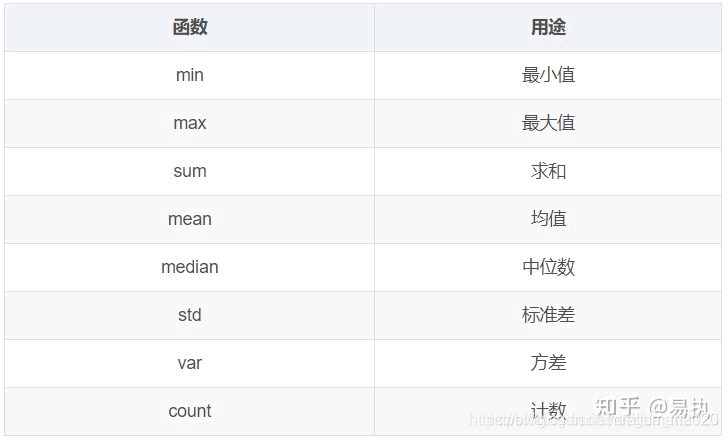
2.1 对分组后所有数据进行聚合
默认情况对分组之后其他列进行聚合

In [18]:
df_agg = data.groupby('company').agg(['min', 'mean', 'max'])
print(df_agg)


        salary                 age          
           min     mean    max min  mean max
company                                     
A        10000  30000.0  50000  25  31.0  40
B        10000  20000.0  40000  30  35.0  45
C        50000  50000.0  50000  20  27.5  35


In [20]:
print(data.groupby('company').agg({'age': ['min', 'mean', 'max']}))
print(data.groupby('company').agg({'age': ['min', 'mean', 'max'], 'salary': 'min'}))


        age          
        min  mean max
company              
A        25  31.0  40
B        30  35.0  45
C        20  27.5  35
        age           salary
        min  mean max    min
company                     
A        25  31.0  40  10000
B        30  35.0  45  10000
C        20  27.5  35  50000


2.2 对分组后的部分列进行聚合
某些情况，只需要对部分数据进行不同的聚合操作，可以通过字典来构建
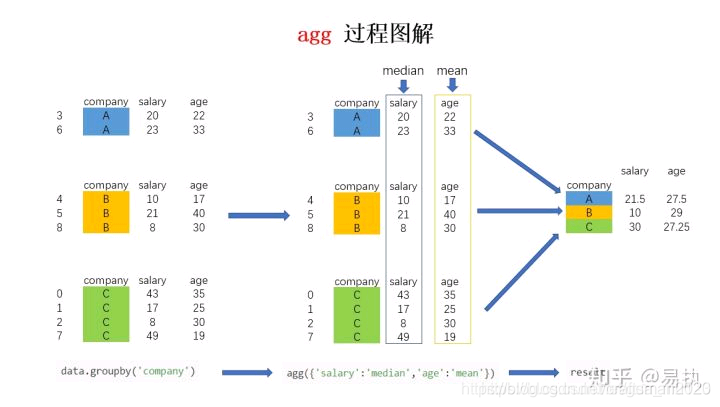
3. groupby|transform
transform是一种什么数据操作？和agg有什么区别呢？为了更好地理解transform和agg的不同，下面从实际的应用场景出发进行对比。

在上面的agg中，我们学会了如何求不同公司员工的平均薪水，如果现在需要在原数据集中新增一列avg_salary，代表员工所在的公司的平均薪水（相同公司的员工具有一样的平均薪水），该怎么实现呢？如果按照正常的步骤来计算，需要先求得不同公司的平均薪水，然后按照员工和公司的对应关系填充到对应的位置，不用transform的话，实现代码如下：

In [22]:
avg_salary_dict = data.groupby('company')['salary'].mean().to_dict()
print('avg_salary_dict = ', avg_salary_dict)
data['avg_salary'] = data['company'].map(avg_salary_dict)
print('data = \n', data)


avg_salary_dict =  {'A': 30000.0, 'B': 20000.0, 'C': 50000.0}
data = 
   company  salary  age  avg_salary
0       A   10000   25     30000.0
1       B   10000   30     20000.0
2       C   50000   35     50000.0
3       A   50000   40     30000.0
4       B   40000   45     20000.0
5       C   50000   20     50000.0
6       A   30000   25     30000.0
7       B   10000   30     20000.0
8       A   20000   30     30000.0
9       A   40000   35     30000.0


如果使用transform的话，仅需要一行代码：

In [23]:
data['avg_salary'] = data.groupby('company')['salary'].transform('mean')
print('data = \n', data)


data = 
   company  salary  age  avg_salary
0       A   10000   25     30000.0
1       B   10000   30     20000.0
2       C   50000   35     50000.0
3       A   50000   40     30000.0
4       B   40000   45     20000.0
5       C   50000   20     50000.0
6       A   30000   25     30000.0
7       B   10000   30     20000.0
8       A   20000   30     30000.0
9       A   40000   35     30000.0


3.1 transform实现过程图解
还是以图解的方式来看看进行groupby后transform的实现过程（为了更直观展示，图中加入了company列，实际按照上面的代码只有salary列）：

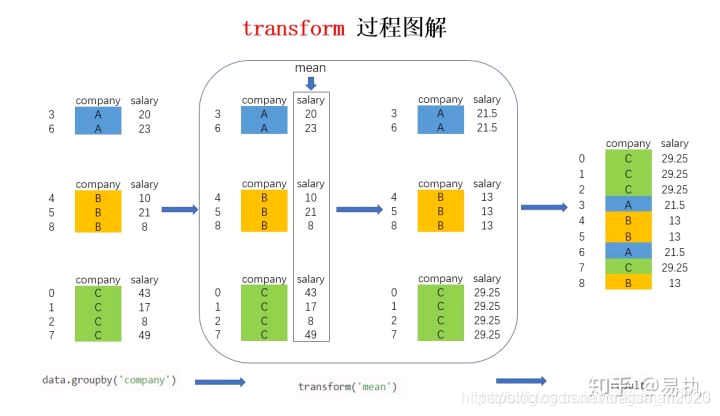
图中的大方框是transform和agg所不一样的地方，对agg而言，会计算得到A，B，C公司对应的均值并直接返回，但对transform而言，则会对每一条数据求得相应的结果，同一组内的样本会有相同的值，组内求完均值后会按照原索引的顺序返回结果，如果有不理解的可以拿这张图和agg那张对比一下。

4. groupby|apply
apply应该是大家的老朋友了，它相比agg和transform而言更加灵活，能够传入任意自定义的函数，实现复杂的数据操作。在Pandas数据处理三板斧——map、apply、applymap详解中，介绍了apply的使用，那在groupby后使用apply和之前所介绍的有什么区别呢？

区别是有的，但是整个实现原理是基本一致的。两者的区别在于，对于groupby后的apply，以分组后的子DataFrame作为参数传入指定函数的，基本操作单位是DataFrame，而之前介绍的apply的基本操作单位是Series。还是以一个案例来介绍groupby后的apply用法。

假设我现在需要获取各个公司年龄最大的员工的数据，该怎么实现呢？可以用以下代码实现：

In [25]:
def get_oldest_staff(x):
    df = x.sort_values(by= 'age', ascending = True)
    return df.iloc[-1, :]


oldest_staff = data.groupby('company', as_index = False).apply(get_oldest_staff)
print('oldest_staff = \n', oldest_staff)

oldest_staff1 = data.groupby('company').agg({'age': 'max'})
print('oldest_staff1 = \n', oldest_staff1)


oldest_staff = 
   company  salary  age  avg_salary
0       A   50000   40     30000.0
1       B   40000   45     20000.0
2       C   50000   35     50000.0
oldest_staff1 = 
          age
company     
A         40
B         45
C         35


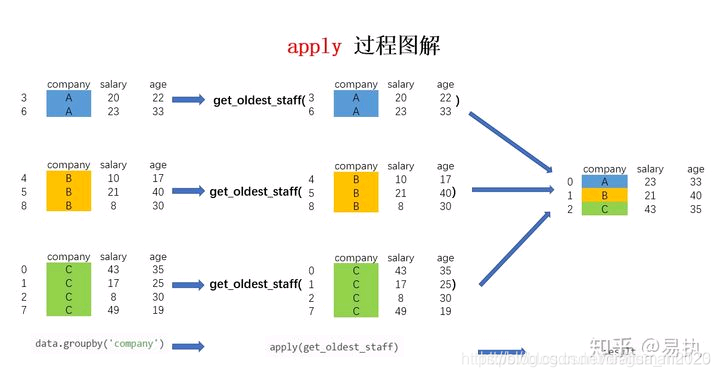

可以看到，此处的apply和上篇文章中所介绍的作用原理基本一致，只是传入函数的参数由Series变为了此处的分组DataFrame。

最后，关于apply的使用，这里有个小建议，虽然说apply拥有更大的灵活性，但apply的运行效率会比agg和transform更慢。所以，groupby之后能用agg和transform解决的问题还是优先使用这两个方法，实在解决不了了才考虑使用apply进行操作。